In [1]:
import csv
import pprint
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from Config import apikey
import seaborn as sns
#Import df from csv
path=("data.csv")
df=pd.read_csv(path)
df

,Unnamed: 0,ticker,v,vw,o,c,h,l,t,n
0,2,BUD,185073263.0,58.7384,62.43,53.94,67.91,50.59,1641013200000,2105726
1,3,BUD,176759102.0,57.2436,64.01,55.02,66.05,50.59,1643691600000,2060645
2,4,BUD,177299717.0,55.8980,59.94,52.51,63.45,50.59,1646110800000,2053783
3,5,BUD,160603099.0,54.0878,60.79,48.57,63.45,47.23,1648785600000,1951050
4,6,BUD,170988591.0,51.7573,56.98,45.23,58.37,44.51,1651377600000,2004952
...,...,...,...,...,...,...,...,...,...,...
127,134,SBUX,537193724.0,96.9278,98.73,100.01,104.46,89.21,1688184000000,8717838
128,135,SBUX,405849391.0,95.7062,101.47,100.01,104.46,89.21,1690862400000,6640231
129,136,SBUX,278809560.0,94.1343,98.40,100.01,101.92,89.21,1693540800000,4407215
130,137,SBUX,165678871.0,93.6594,91.05,100.01,101.92,89.21,1696132800000,2570335


In [2]:
#statistical analysis

# Filter the DataFrame by ticker
bud_df = df[df['ticker'] == 'BUD']
coors_df= df[df['ticker'] == 'TAP']
coke_df= df[df['ticker'] == 'KO']
pepsi_df= df[df['ticker'] == 'PEP']
star_df= df[df['ticker'] == 'SBUX']
dutch_df= df[df['ticker'] == 'BROS']

# .describe() but can be subbed for any of the above
bud_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,12.500000,1.812907e+08,56.022755,57.312727,56.736818,62.579545,49.656364,1.669849e+12,2.137141e+06
std,6.493587,6.946098e+07,2.905519,5.376653,4.355902,3.849273,3.623617,1.824194e+10,7.926802e+05
min,2.000000,5.863473e+06,50.994300,44.990000,45.230000,56.590000,44.510000,1.641013e+12,7.811900e+04
25%,7.250000,1.653056e+08,53.956700,54.067500,55.147500,58.580000,45.190000,1.654704e+12,1.932159e+06
50%,12.500000,1.748545e+08,55.884550,56.990000,58.130000,62.210000,51.125000,1.669912e+12,2.057214e+06
75%,17.750000,2.288269e+08,58.364700,60.757500,58.452500,66.837500,51.660000,1.684922e+12,2.703719e+06
max,23.000000,2.828465e+08,60.630900,66.520000,65.650000,67.910000,56.015000,1.698811e+12,3.257020e+06


In [3]:
coors_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,35.500000,1.695771e+08,57.043523,55.352273,56.930455,63.615373,50.406591,1.669849e+12,2.327904e+06
std,6.493587,6.523035e+07,4.813839,5.838732,5.518910,5.527700,4.051929,1.824194e+10,8.435570e+05
min,25.000000,6.114926e+06,51.205400,46.540000,48.240000,56.280000,46.470000,1.641013e+12,9.146800e+04
25%,30.250000,1.551000e+08,52.973725,51.160000,53.500000,59.565000,46.685000,1.654704e+12,2.226802e+06
50%,35.500000,1.758221e+08,55.970300,53.935000,57.830000,60.120000,49.110000,1.669912e+12,2.390796e+06
75%,40.750000,1.984957e+08,61.628500,59.485000,58.310000,70.213650,55.665000,1.684922e+12,2.773997e+06
max,46.000000,2.554809e+08,64.412300,65.640000,70.670000,70.900000,57.340000,1.698811e+12,3.405737e+06


In [4]:
coke_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,58.500000,1.481791e+09,59.987964,61.059091,59.635455,64.280682,55.046945,1.669849e+12,1.261461e+07
std,6.493587,5.382762e+08,2.285344,2.563097,2.948402,2.842158,2.739858,1.824194e+10,4.039328e+06
min,48.000000,2.719803e+07,54.452300,55.910000,54.350000,57.150000,51.550000,1.641013e+12,2.825730e+05
25%,53.250000,1.514239e+09,58.750975,59.955000,57.090000,63.621250,52.166250,1.654704e+12,1.317738e+07
50%,58.500000,1.617672e+09,60.758800,61.360000,60.085000,64.990000,54.015000,1.669912e+12,1.412076e+07
75%,63.750000,1.665317e+09,61.343400,62.922500,61.947500,65.470000,57.500000,1.684922e+12,1.463761e+07
max,69.000000,2.310557e+09,62.960500,65.280000,65.170000,67.200000,58.370000,1.698811e+12,1.611165e+07


In [5]:
pepsi_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,81.500000,5.060628e+08,173.680364,174.362959,173.812273,186.258182,159.549673,1.669849e+12,7.122965e+06
std,6.493587,1.662324e+08,6.277443,7.911672,8.375284,8.606498,5.922222,1.824194e+10,2.148387e+06
min,71.000000,1.209588e+07,162.098200,163.070000,160.560000,167.160000,153.370000,1.641013e+12,2.564790e+05
25%,76.250000,5.446501e+08,168.185050,168.405000,166.830000,181.070000,155.100700,1.654704e+12,7.580666e+06
50%,81.500000,5.660279e+08,174.852700,172.657500,170.670000,186.840000,155.830000,1.669912e+12,7.873740e+06
75%,86.750000,5.954328e+08,177.687000,180.852500,179.900000,192.380000,162.315000,1.684922e+12,8.075407e+06
max,92.000000,6.777669e+08,184.597200,190.450000,191.360000,196.880000,173.480000,1.698811e+12,8.940813e+06


In [6]:
star_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,127.500000,7.567572e+08,93.423795,94.473159,96.180455,106.335682,82.874091,1.669849e+12,1.010191e+07
std,6.493587,3.143400e+08,7.914871,11.353584,7.902175,7.798738,10.166317,1.824194e+10,3.550153e+06
min,117.000000,3.768883e+07,80.150300,75.250000,78.110000,93.480000,68.390000,1.641013e+12,4.361260e+05
25%,122.250000,7.031187e+08,86.371175,85.577500,93.865000,101.920000,71.695000,1.654704e+12,1.029036e+07
50%,127.500000,7.664575e+08,95.725050,94.710000,98.285000,105.000000,86.090000,1.669912e+12,1.096490e+07
75%,132.750000,9.047845e+08,99.022000,101.242500,100.010000,114.387500,89.210000,1.684922e+12,1.226015e+07
max,138.000000,1.268763e+09,103.912800,116.470000,109.340000,117.800000,96.520000,1.698811e+12,1.454381e+07


In [7]:
dutch_df.describe()

,Unnamed: 0,v,vw,o,c,h,l,t,n
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,2.200000e+01
mean,104.500000,1.311987e+08,32.695245,36.158636,30.229091,44.254482,23.776727,1.669849e+12,1.632919e+06
std,6.493587,6.103703e+07,5.771851,9.418268,4.593126,12.758962,2.757574,1.824194e+10,6.407467e+05
min,94.000000,2.761224e+06,24.715700,23.140000,23.690000,26.095000,20.050000,1.641013e+12,3.539400e+04
25%,99.250000,1.101076e+08,27.830075,29.917500,25.960000,35.090000,22.665000,1.654704e+12,1.494380e+06
50%,104.500000,1.321630e+08,32.649300,32.485000,29.500000,41.439900,23.080000,1.669912e+12,1.724668e+06
75%,109.750000,1.469838e+08,36.236875,37.935000,34.090000,54.180000,26.560250,1.684922e+12,1.969467e+06
max,115.000000,2.564415e+08,44.247600,56.430000,40.280000,66.000000,27.940000,1.698811e+12,2.699940e+06


In [8]:

df.corr()

,Unnamed: 0,v,vw,o,c,h,l,t,n
Unnamed: 0,1.000000,0.110965,0.238445,0.251768,0.237672,0.275937,0.218359,0.159339,0.276032
v,0.110965,1.000000,0.119016,0.120903,0.120263,0.109989,0.122237,-0.291731,0.944391
vw,0.238445,0.119016,1.000000,0.989317,0.993831,0.994578,0.995240,0.010476,0.313071
o,0.251768,0.120903,0.989317,1.000000,0.976619,0.989780,0.982802,0.004383,0.316582
c,0.237672,0.120263,0.993831,0.976619,1.000000,0.986522,0.990756,0.001979,0.311764
h,0.275937,0.109989,0.994578,0.989780,0.986522,1.000000,0.981881,-0.032997,0.314292
l,0.218359,0.122237,0.995240,0.982802,0.990756,0.981881,1.000000,0.055387,0.308677
t,0.159339,-0.291731,0.010476,0.004383,0.001979,-0.032997,0.055387,1.000000,-0.258858
n,0.276032,0.944391,0.313071,0.316582,0.311764,0.314292,0.308677,-0.258858,1.000000


In [9]:
#Bud full stats
bud_array = bud_df['h'].to_numpy()

b_mean= np.mean(bud_array)
b_median= np.median(bud_array)
b_mode= st.mode(bud_array)
b_var= np.var(bud_array)
b_std= np.std(bud_array)
b_zscore= st.zscore(bud_array)

In [10]:
#Coors full stats
coors_array = coors_df['h'].to_numpy()

c_mean= np.mean(coors_array)
c_median= np.median(coors_array)
c_mode= st.mode(coors_array)
c_var= np.var(coors_array)
c_std= np.std(coors_array)
c_zscore= st.zscore(coors_array)

In [11]:
#Coke full stats
coke_array = coke_df['h'].to_numpy()

ck_mean= np.mean(coke_array)
ck_median= np.median(coke_array)
ck_mode= st.mode(coke_array)
ck_var= np.var(coke_array)
ck_std= np.std(coke_array)
ck_zscore= st.zscore(coke_array)

In [12]:
#Pepsi full stats
pepsi_array = pepsi_df['h'].to_numpy()

p_mean= np.mean(pepsi_array)
p_median= np.median(pepsi_array)
p_mode= st.mode(pepsi_array)
p_var= np.var(pepsi_array)
p_std= np.std(pepsi_array)
p_zscore= st.zscore(pepsi_array)

In [13]:
#Starbucks full stats
star_array = star_df['h'].to_numpy()

s_mean= np.mean(star_array)
s_median= np.median(star_array)
s_mode= st.mode(star_array)
s_var= np.var(star_array)
s_std= np.std(star_array)
s_zscore= st.zscore(star_array)

In [14]:
#Dutch full stats
dutch_array = dutch_df['h'].to_numpy()

d_mean= np.mean(dutch_array)
d_median= np.median(dutch_array)
d_mode= st.mode(dutch_array)
d_var= np.var(dutch_array)
d_std= np.std(dutch_array)
d_zscore= st.zscore(dutch_array)

In [15]:
#Full stat DF
stock_stats_df = pd.DataFrame({
    "stock": ["Budweiser", "Coors", "Coke", "Pepsi", "Starbucks", "Dutch"], 
    "mean": [b_mean, c_mean, ck_mean, p_mean, s_mean, d_mean],
    "median": [b_median, c_median, ck_median, p_median, s_median, d_median],
    "mode": [b_mode[0],c_mode[0],ck_mode, p_mode, s_mode, d_mean],
    "variance": [b_var, c_var, ck_var, p_var, s_var, d_var],
    "standard deviation": [b_std, c_std, ck_std, p_std, s_std, d_std],
    "z-score":[b_zscore, c_zscore, ck_zscore, p_zscore, s_zscore, d_zscore]
})
stock_stats_df

,stock,mean,median,mode,variance,standard deviation,z-score
0,Budweiser,62.579545,62.2100,[67.09],14.143404,3.760772,"[1.4173831503928114, 0.922803816257278, 0.2314..."
1,Coors,63.615373,60.1200,[60.12],29.166577,5.400609,"[-1.1416069480132878, -0.7842398418983132, -0...."
2,Coke,64.280682,64.9900,"([64.99], [5])",7.710685,2.776812,"[1.051320076661256, 1.051320076661256, 1.05132..."
3,Pepsi,186.258182,186.8400,"([196.88], [5])",70.704906,8.408621,"[-1.0273006596235605, -1.0273006596235605, -0...."
4,Starbucks,106.335682,105.0000,"([115.48], [5])",58.055760,7.619433,"[1.5046156492728706, -0.943073032592439, -1.68..."
5,Dutch,44.254482,41.4399,44.2545,155.391522,12.465614,"[1.7444402568291417, 1.7444402568291417, 1.744..."


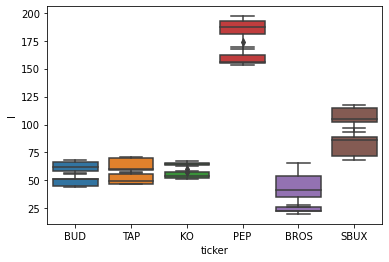

In [27]:
#box and whisker for high and low, Qs (needs work)

sns.boxplot(x='ticker', y='h', data=df)
sns.boxplot(x='ticker', y='l', data=df)

In [17]:
def fix_unix_time(unix_time_values):
    scaled_time_values = (unix_time_values - min(unix_time_values)) / (max(unix_time_values) - min(unix_time_values))
    return scaled_time_values

# Create a list of Unix time values
t = df['t']

# Convert and scale the Unix time values
st = fix_unix_time(t)

# Add the scaled time values to the DataFrame
df['st'] = st

# Print the DataFrame
df


,Unnamed: 0,ticker,v,vw,o,c,h,l,t,n,st
0,2,BUD,185073263.0,58.7384,62.43,53.94,67.91,50.59,1641013200000,2105726,0.000000
1,3,BUD,176759102.0,57.2436,64.01,55.02,66.05,50.59,1643691600000,2060645,0.046341
2,4,BUD,177299717.0,55.8980,59.94,52.51,63.45,50.59,1646110800000,2053783,0.088197
3,5,BUD,160603099.0,54.0878,60.79,48.57,63.45,47.23,1648785600000,1951050,0.134475
4,6,BUD,170988591.0,51.7573,56.98,45.23,58.37,44.51,1651377600000,2004952,0.179321
...,...,...,...,...,...,...,...,...,...,...,...
127,134,SBUX,537193724.0,96.9278,98.73,100.01,104.46,89.21,1688184000000,8717838,0.816132
128,135,SBUX,405849391.0,95.7062,101.47,100.01,104.46,89.21,1690862400000,6640231,0.862473
129,136,SBUX,278809560.0,94.1343,98.40,100.01,101.92,89.21,1693540800000,4407215,0.908813
130,137,SBUX,165678871.0,93.6594,91.05,100.01,101.92,89.21,1696132800000,2570335,0.953659


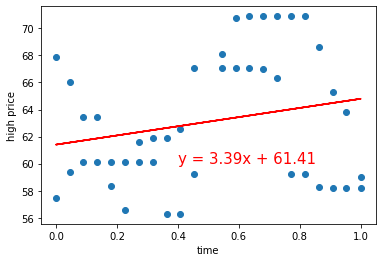

In [18]:
#Scatter plots
ticker_index = df.index[df['ticker'].isin(['BUD', 'TAP'])].values
ticker_data = df.iloc[ticker_index]
x_values = ticker_data['st']
y_values = ticker_data['h']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('time')
plt.ylabel('high price')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.4,60),fontsize=15,color="red")
plt.show()

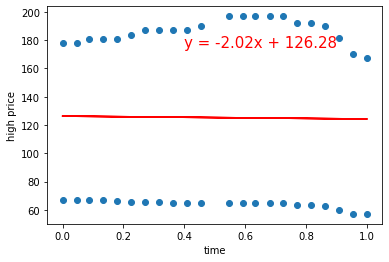

In [19]:
ticker_index = df.index[df['ticker'].isin(['KO', 'PEP'])].values
ticker_data = df.iloc[ticker_index]
x_values = ticker_data['st']
y_values = ticker_data['h']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('time')
plt.ylabel('high price')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.4,175),fontsize=15,color="red")
plt.show()

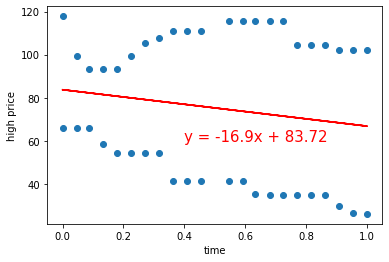

In [20]:
ticker_index = df.index[df['ticker'].isin(['SBUX', 'BROS'])].values
ticker_data = df.iloc[ticker_index]
x_values = ticker_data['st']
y_values = ticker_data['h']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('time')
plt.ylabel('high price')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.4,60),fontsize=15,color="red")
plt.show()